In [ ]:
import os
!pip install kaggle

# Download dataset using Kaggle API
!kaggle datasets download -d utkarshsaxenadn/car-vs-bike-classification-dataset
! unzip "car-vs-bike-classification-dataset.zip" -d "./dataset"

Dataset URL: https://www.kaggle.com/datasets/utkarshsaxenadn/car-vs-bike-classification-dataset
License(s): CC0-1.0
 97% 100M/103M [00:01<00:00, 84.6MB/s] 
100% 103M/103M [00:01<00:00, 79.0MB/s]
Archive:  car-vs-bike-classification-dataset.zip
  inflating: ./dataset/Car-Bike-Dataset/Bike/Bike (1).jpeg  
  inflating: ./dataset/Car-Bike-Dataset/Bike/Bike (1).jpg  
  inflating: ./dataset/Car-Bike-Dataset/Bike/Bike (1).png  
  inflating: ./dataset/Car-Bike-Dataset/Bike/Bike (10).jpeg  
  inflating: ./dataset/Car-Bike-Dataset/Bike/Bike (10).jpg  
  inflating: ./dataset/Car-Bike-Dataset/Bike/Bike (10).png  
  inflating: ./dataset/Car-Bike-Dataset/Bike/Bike (100).jpeg  
  inflating: ./dataset/Car-Bike-Dataset/Bike/Bike (100).jpg  
  inflating: ./dataset/Car-Bike-Dataset/Bike/Bike (1000).jpeg  
  inflating: ./dataset/Car-Bike-Dataset/Bike/Bike (1001).jpeg  
  inflating: ./dataset/Car-Bike-Dataset/Bike/Bike (1002).jpeg  
  inflating: ./dataset/Car-Bike-Dataset/Bike/Bike (1003).jpeg  
  inflatin

In [ ]:
from PIL import Image
import os

def convert_images_to_jpg(input_folder, output_folder):
    # Ensure the output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        # Check if the file is an image
         # Add more extensions as needed
            input_path = os.path.join(input_folder, filename)
            # Remove the original extension and replace it with .jpg
            output_filename = os.path.splitext(filename)[0] + '.jpeg'
            output_path = os.path.join(output_folder, output_filename)

            try:
                # Open the image and convert it to RGB (required for saving as .jpg)
                with Image.open(input_path) as img:
                    img = img.convert('RGB')  # Convert to RGB for JPEG format
                    img.save(output_path, 'JPEG')
                print(f"Converted {filename} to {output_filename}")
            except Exception as e:
                print(f"Failed to convert {filename}: {e}")

# Example usage
input_folder_bike = '/content/dataset/Car-Bike-Dataset/Bike'  # Replace with the path to your input folder
output_folder_bike = '/content/dataset-new/Car-Bike-Dataset/Bike'  # Replace with the path to your output folder

input_folder_cars = '/content/dataset/Car-Bike-Dataset/Car'  # Replace with the path to your input folder
output_folder_cars = '/content/dataset-new/Car-Bike-Dataset/Car'  # Replace with the path to your output folder

convert_images_to_jpg(input_folder_bike, output_folder_bike)
convert_images_to_jpg(input_folder_cars, output_folder_cars)

Converted Bike (1573).jpeg to Bike (1573).jpeg
Converted Bike (637).jpeg to Bike (637).jpeg
Converted Bike (138).jpg to Bike (138).jpeg
Converted Bike (294).jpeg to Bike (294).jpeg
Converted Bike (1612).jpeg to Bike (1612).jpeg
Converted Bike (1303).jpeg to Bike (1303).jpeg
Converted Bike (1175).jpeg to Bike (1175).jpeg
Converted images (123).jpeg to images (123).jpeg
Converted Bike (1436).jpeg to Bike (1436).jpeg
Converted Bike (166).jpg to Bike (166).jpeg
Converted Bike (1290).jpeg to Bike (1290).jpeg
Converted Bike (701).jpeg to Bike (701).jpeg
Converted Bike (1582).jpeg to Bike (1582).jpeg
Converted Bike (519).jpeg to Bike (519).jpeg
Converted Bike (1346).jpeg to Bike (1346).jpeg
Converted Bike (1375).jpeg to Bike (1375).jpeg
Converted image (3).jpeg to image (3).jpeg
Converted Bike (95).jpeg to Bike (95).jpeg
Converted Bike (146).jpeg to Bike (146).jpeg
Converted Bike (183).jpeg to Bike (183).jpeg
Converted Bike (974).jpeg to Bike (974).jpeg
Converted Bike (1422).jpeg to Bike (142

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Converted Bike (269).jpeg to Bike (269).jpeg
Converted Bike (218).jpeg to Bike (218).jpeg
Converted Bike (124).jpg to Bike (124).jpeg
Converted Bike (1078).jpeg to Bike (1078).jpeg
Converted Bike (1349).jpeg to Bike (1349).jpeg
Converted Bike (1521).jpeg to Bike (1521).jpeg
Converted image (22).jpeg to image (22).jpeg
Converted Bike (1403).jpeg to Bike (1403).jpeg
Converted Bike (62).jpeg to Bike (62).jpeg
Converted Bike (362).jpeg to Bike (362).jpeg
Converted Bike (1617).jpeg to Bike (1617).jpeg
Converted Bike (1433).jpeg to Bike (1433).jpeg
Converted Bike (1541).jpeg to Bike (1541).jpeg
Converted Bike (134).jpg to Bike (134).jpeg
Converted Bike (1113).jpeg to Bike (1113).jpeg
Converted Bike (21).png to Bike (21).jpeg
Converted Bike (115).jpg to Bike (115).jpeg
Converted Bike (774).jpeg to Bike (774).jpeg
Converted Bike (957).jpeg to Bike (957).jpeg
Converted Bike (1540).jpeg to Bike (1540).jpeg
Converted Bike (1287).jpeg to Bike (1287).jpeg
Converted images (127).jpeg to images (127)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3  # Closest Keras implementation to GoogLeNet
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/dataset-new/Car-Bike-Dataset",          # Path to the dataset directory
    seed=404,             # Seed for shuffling
    image_size=(224, 224),# Resize images to 224x224
    batch_size=1          # Load images one by one
)

Found 3741 files belonging to 2 classes.


In [ ]:
#Convert Dataset to Tensors
x, y = zip(*train_ds)
x = tf.concat(x, axis=0)
y = tf.concat(y, axis=0)

In [ ]:
#Split the Data
training_ratio = int(0.8 * len(x))
validation_ratio = int(0.2 * training_ratio)

x_train = x[:training_ratio - validation_ratio]
y_train = y[:training_ratio - validation_ratio]

x_val = x[training_ratio - validation_ratio:training_ratio]
y_val = y[training_ratio - validation_ratio:training_ratio]

x_test = x[int(training_ratio):]
y_test = y[int(training_ratio):]

In [ ]:
print("Training data shape:", x_train.shape)
print("Validation data shape:", x_val.shape)
print("Testing data shape:", x_test.shape)

Training data shape: (2394, 224, 224, 3)
Validation data shape: (598, 224, 224, 3)
Testing data shape: (749, 224, 224, 3)


In [ ]:
#Preprocess the Images
x_train_preprocessed = preprocess_input(x_train)
x_val_preprocessed = preprocess_input(x_val)
x_test_preprocessed = preprocess_input(x_test)

In [ ]:
# Load the ResNet101 model without the top layer and with ImageNet weights
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Build the Model
model = Sequential()
model.add(base_model)  # Add the entire ResNet101 base model as a single layer

# Freeze ResNet101 layers
for layer in model.layers:
    layer.trainable = False

# Add custom layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))  # Adjust the number of classes as needed

# Print model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 5, 5, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │       3,276,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,081,794 (95.68 MB)

 Trainable params: 3,279,010 (12.51 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
    x_train_preprocessed,
    y_train,
    validation_data=(x_val_preprocessed, y_val),
    batch_size=64,
    epochs=10
)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.5906 - loss: 53.0282 - val_accuracy: 0.5585 - val_loss: 0.6542
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 36s 159ms/step - accuracy: 0.5466 - loss: 0.7031 - val_accuracy: 0.5318 - val_loss: 0.6665
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - accuracy: 0.5291 - loss: 0.7294 - val_accuracy: 0.5301 - val_loss: 0.6657
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 155ms/step - accuracy: 0.5213 - loss: 0.6945 - val_accuracy: 0.5033 - val_loss: 0.6865
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 155ms/step - accuracy: 0.5222 - loss: 0.6940 - val_accuracy: 0.5033 - val_loss: 0.6881
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 151ms/step - accuracy: 0.5210 - loss: 0.7010 - val_accuracy: 0.4933 - val_loss: 0.6935
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - accuracy: 0.5290 - loss: 0.6919 - val_accuracy: 0.4933 - val_loss: 0.6931
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - accuracy: 0.4978 - loss: 0.6936 - val_accuracy

In [ ]:
# Calculate accuracy
Y_pred = model.predict(x_test_preprocessed)
predicted_classes = Y_pred.argmax(axis=1)

# Move y_test to the CPU to match predicted_classes
y_test_cpu = y_test.cpu().numpy()

accuracy = accuracy_score(y_test_cpu, predicted_classes)
print("Accuracy:", accuracy)

24/24 ━━━━━━━━━━━━━━━━━━━━ 18s 434ms/step


Instructions for updating:
Use tf.identity with explicit device placement instead.


Accuracy: 0.9959946595460614


24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step
Accuracy: 0.9959946595460614
Confusion Matrix:
[[337   2]
 [  1 409]]


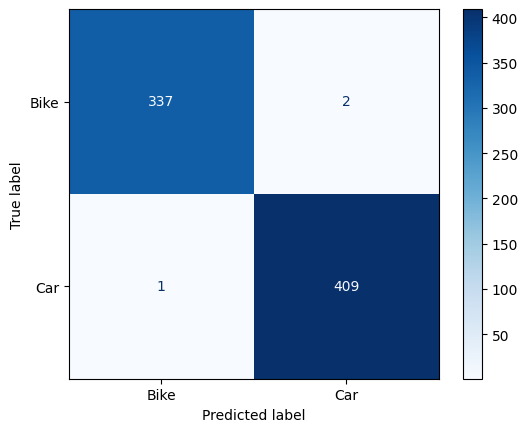

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Predict classes
Y_pred = model.predict(x_test_preprocessed)
predicted_classes = Y_pred.argmax(axis=1)

# Move y_test to the CPU to match predicted_classes
y_test_cpu = y_test.cpu().numpy()

# Calculate accuracy using y_test_cpu
accuracy = accuracy_score(y_test_cpu, predicted_classes)
print("Accuracy:", accuracy)

# Generate confusion matrix
cm = confusion_matrix(y_test_cpu, predicted_classes) #use y_test_cpu

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Bike","Car"])  # Replace with your class labels if available
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

Confusion Matrix:
 [[337   2]
 [  1 409]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       339
           1       1.00      1.00      1.00       410

    accuracy                           1.00       749
   macro avg       1.00      1.00      1.00       749
weighted avg       1.00      1.00      1.00       749



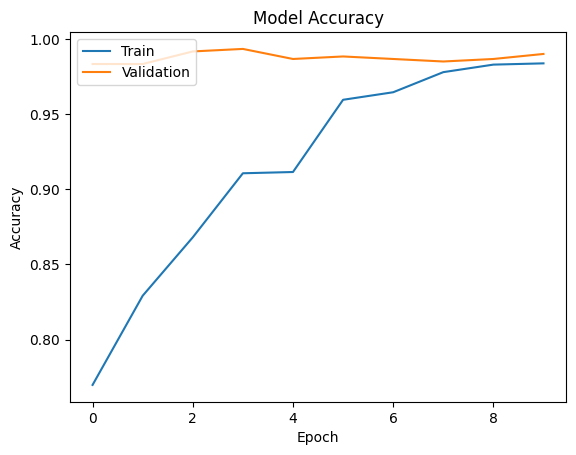

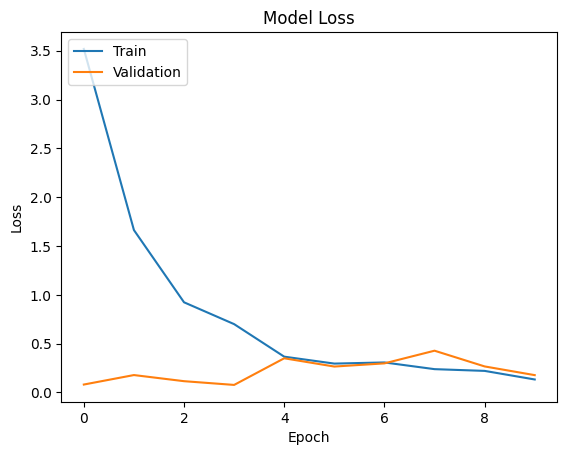

In [ ]:
# Step 11: Confusion Matrix and Classification Report
cm = confusion_matrix(y_test, predicted_classes)
print("Confusion Matrix:\n", cm)

cr = classification_report(y_test, predicted_classes)
print("Classification Report:\n", cr)

# Step 12: Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Apply Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the augmentation to the training data
datagen.fit(x_train_preprocessed)

In [ ]:
# Implement Early Stopping and Regularization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Add L2 regularization and increased dropout
model = Sequential()
model.add(base_model)  # Add the entire ResNet101 base model as a single layer

# Freeze ResNet101 layers
for layer in model.layers:
    layer.trainable = False

# Add custom layers with L2 regularization
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.6))  # Increased dropout
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.6))
model.add(Dense(2, activation='softmax'))  # Adjust the number of classes as needed

# Print model summary
model.summary()

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping and data augmentation
history = model.fit(
    datagen.flow(x_train_preprocessed, y_train, batch_size=64),
    validation_data=(x_val_preprocessed, y_val),
    epochs=10,
    callbacks=[early_stopping]
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet101 (Functional)               │ (None, 7, 7, 2048)          │      42,658,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      12,845,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,511,746 (211.76 MB)

 Trainable params: 12,853,570 (49.03 MB)

 Non-trainable params: 42,658,176 (162.73 MB)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.7552 - loss: 4.3748 - val_accuracy: 0.9866 - val_loss: 2.9895
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 34s 792ms/step - accuracy: 0.9171 - loss: 3.1285 - val_accuracy: 0.9950 - val_loss: 2.7507
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 794ms/step - accuracy: 0.9128 - loss: 2.9469 - val_accuracy: 0.9950 - val_loss: 2.5975
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 766ms/step - accuracy: 0.9276 - loss: 2.7481 - val_accuracy: 0.9933 - val_loss: 2.4812
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 35s 811ms/step - accuracy: 0.9320 - loss: 2.5973 - val_accuracy: 0.9900 - val_loss: 2.3713
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 35s 763ms/step - accuracy: 0.9382 - loss: 2.4933 - val_accuracy: 0.9883 - val_loss: 2.2705
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 44s 845ms/step - accuracy: 0.9519 - loss: 2.3585 - val_accuracy: 0.9900 - val_loss: 2.1681
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 38s 783ms/step - accuracy: 0.9508 - loss: 2.2738 - val_accuracy: 0.9916 -

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step
Accuracy: 0.9933244325767691
Confusion Matrix:
 [[335   4]
 [  1 409]]
Classification Report:
               precision    recall  f1-score   support

        Bike       1.00      0.99      0.99       339
         Car       0.99      1.00      0.99       410

    accuracy                           0.99       749
   macro avg       0.99      0.99      0.99       749
weighted avg       0.99      0.99      0.99       749



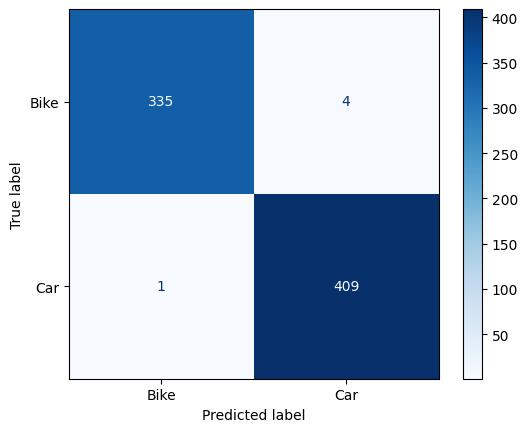

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict classes
Y_pred = model.predict(x_test_preprocessed)
predicted_classes = Y_pred.argmax(axis=1)

# Move y_test to CPU for comparison
y_test_cpu = y_test.cpu().numpy()

# Calculate accuracy
accuracy = accuracy_score(y_test_cpu, predicted_classes)
print("Accuracy:", accuracy)

# Generate confusion matrix
cm = confusion_matrix(y_test_cpu, predicted_classes)
print("Confusion Matrix:\n", cm)

# Classification report
cr = classification_report(y_test_cpu, predicted_classes, target_names=["Bike", "Car"])  # Replace with your class labels
print("Classification Report:\n", cr)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Bike", "Car"])
disp.plot(cmap=plt.cm.Blues)
plt.show()

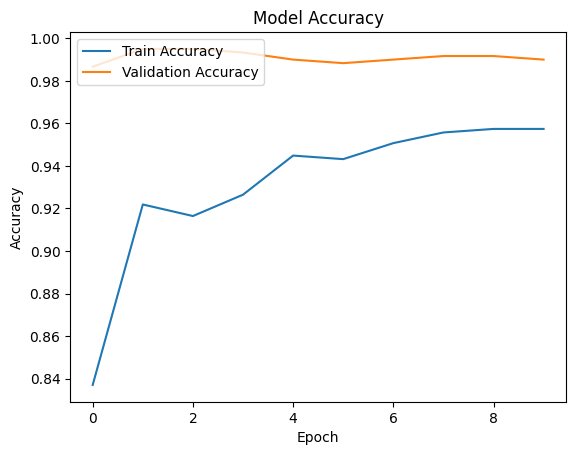

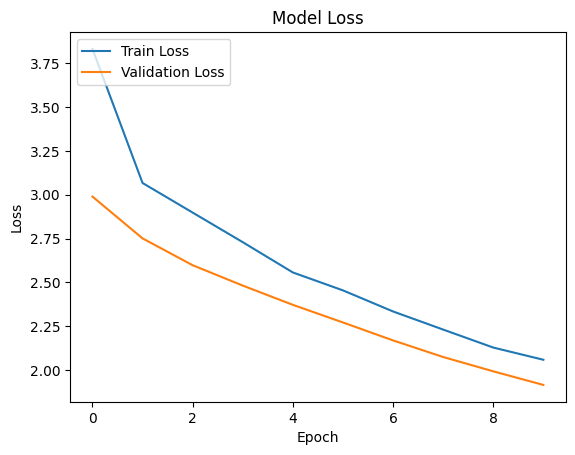

In [ ]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

